In [3]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle

from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
# allocate memory for data and labels
x = tf.placeholder(tf.float32, [None, 256, 256, 3])
y = tf.placeholder(tf.int32, [None])
training = tf.placeholder(tf.bool)

# Check to make sure GPU is being used
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

#Add config to allow GPU memory growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True



Found GPU at: /device:GPU:0


# Part 0 : Load Data

In [0]:
def normalize(imgs):
  imgs = imgs/255.0
  imgs = 2*(imgs - 0.5)
  return imgs

In [0]:
# # Load the data
# def load_bboxes(filepath):
#   return np.loadtxt(filepath, delimiter=',', dtype=np.int32)


# # Load BBox
# bbox_filepath = 'drive/My Drive/BE537/regions_bbox.csv'
# bboxes = load_bboxes(bbox_filepath)

# # Load and Save Images as Npy
# train_data = load_imgs(np.arange(int(np.floor(0.8*bboxes.shape[0]))))
# test_data = load_imgs(np.arange(int(np.floor(0.8*bboxes.shape[0])), bboxes.shape[0]))
# save_dir = 'gdrive/My Drive/BE537/'
# np.save(save_dir + 'train_imgs.npy', train_data)
# np.save(save_dir + 'test_imgs.npy', test_data)

# use generated train/test data
# Get data
train_data = np.load('drive/My Drive/BE537/train_data.npy')
test_data = np.load('drive/My Drive/BE537/test_data.npy')
#test_data = np.load('drive/My Drive/BE537 Irwin/Augmented Tangles/augmented_boxes_tangles.npy')

train_imgs = np.load('drive/My Drive/BE537/train_imgs.npy')
test_imgs = np.load('drive/My Drive/BE537/test_imgs.npy')

# Separate data and labels
train_labels = train_data[:, 4].astype(np.int32)
# train_bbox = train_data[:,0:4]

test_labels = test_data[:, 4].astype(np.int32)
# test_bbox = test_data[:, 0:4]

# # one hot encode labels
# n_values = np.max(train_labels_pre) + 1
# train_labels = np.eye(n_values)[train_labels_pre]
# test_labels = np.eye(n_values)[test_labels_pre]


In [0]:
print(train_labels.shape)

(1152,)


# Part 1: Train Model

Train the AlexNet: 

*   5 Convolutional Layers
*   Batch Normalization after conv1, conv2
*   Pooling after conv1, conv2, conv5
*   Dropout before fc1, fc2
*   3 FC layers







In [40]:
# Check to make sure GPU is being used
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

#Add config to allow GPU memory growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

#set constraints on training
batch_size = 64
iterations = 300
lr = .003

Found GPU at: /device:GPU:0


In [0]:
# reset graph between runs
tf.reset_default_graph()


# allocate memory for data and labels
x = tf.placeholder(tf.float32, [None, 256, 256, 3])
y = tf.placeholder(tf.int32, [None])
training = tf.placeholder(tf.bool)

  
# Conv Layer 1
conv1 = tf.layers.conv2d(
    inputs=x,
    filters=32,
    kernel_size=[5, 5],
    kernel_initializer = tf.initializers.truncated_normal(
      mean =  0.0,
      stddev = 0.1    
    ),    
    strides=1,
    padding='SAME',
    name='conv1'
)
print("Conv1: ", conv1.shape)

# Normalization 1
bn1 = tf.layers.batch_normalization(conv1, training=training, name='bn1')
relu1 = tf.nn.relu(bn1, name='relu1')

# Average Pooling 1
pool1 = tf.nn.avg_pool(
    value=relu1,
    ksize=[1, 2, 2, 1],
    strides=[1, 2, 2, 1],
    padding='VALID',
    name='pool1'
)  

# Conv Layer 2
conv2 = tf.layers.conv2d(
    inputs=pool1,
    filters=32,
    kernel_size=[5, 5],
    kernel_initializer = tf.initializers.truncated_normal(
      mean =  0.0,
      stddev = 0.1    
    ),
    strides=1,
    padding='SAME',
    name='conv2'
)
print("Conv2: ", conv2.shape)

bn2 = tf.layers.batch_normalization(conv2, training=training, name='bn2')
relu2 = tf.nn.relu(bn2, name='relu2')

# Average Pooling 2
pool2 = tf.nn.avg_pool(
    value=relu2,
    ksize=[1, 2, 2, 1],
    strides=[1, 2, 2, 1],
    padding='VALID',
    name='pool2'
)

# Conv Layer 3
conv3 = tf.layers.conv2d(
    inputs=pool2,
    filters=64,
    kernel_size=[5, 5],
    kernel_initializer = tf.initializers.truncated_normal(
      mean =  0.0,
      stddev = 0.1
    ),
    strides=1,
    padding='SAME',
    name='conv3'
)
print("Conv3: ", conv3.shape)

relu3 = tf.nn.relu(conv3, name = 'relu2')

# Conv Layer 4
conv4 = tf.layers.conv2d(
    inputs=relu3,
    filters=32,
    kernel_size=[5, 5],
    kernel_initializer = tf.initializers.truncated_normal(
      mean =  0.0,
      stddev = 0.1
    ),    
    strides=1,
    padding='SAME',
    name='conv4'
)
print("Conv4: ", conv4.shape)

relu4 = tf.nn.relu(conv4)

# Conv Layer 5
conv5 = tf.layers.conv2d(
    inputs=relu4,
    filters=32,
    kernel_size=[5, 5],
    kernel_initializer = tf.initializers.truncated_normal(
      mean =  0.0,
      stddev = 0.1    
    ),   
    strides=1,
    padding='SAME',
    name='conv5'
)
print("Conv5: ", conv5.shape)

relu5 = tf.nn.relu(conv5)
# Average pooling 5
pool5 = tf.nn.avg_pool(
    value=relu5,
    ksize=[1, 2, 2, 1],
    strides=[1, 2, 2, 1],
    padding='SAME',
    name='pool5'
)

pool5_reshape = tf.reshape (pool5, [-1, pool5.shape[1]*pool5.shape[2]* pool5.shape[3]])
# Dropout 1
drop1 = tf.nn.dropout(
        pool5_reshape,
        keep_prob = .5, #Probability of being kept
        noise_shape = None,
        seed = None,
        name  = 'drop1'
        )

# Fully Connected 1
fc1 = tf.layers.dense(
    inputs= drop1,
    units=64,
    kernel_initializer = tf.initializers.truncated_normal(
      mean =  0.0,
      stddev = 0.1    
    ),    
    name='fc1'
)
print("FC1: ", fc1.shape)


relu_fc1 = tf.nn.relu(fc1, name='relu_fc1')

# Dropout 2
drop2 = tf.nn.dropout(
    relu_fc1,
    keep_prob = .5, #Probability of being kept
    noise_shape = None,
    seed = None,
    name  = 'drop2'
    )

# Fully Connected 2
fc2 = tf.layers.dense(
    inputs=drop2,
    units=10, # change as u will
    kernel_initializer = tf.initializers.truncated_normal(
      mean =  0.0,
      stddev = 0.1    
    ),    
    name='fc2'
)
print("FC2: ", fc2.shape)

relu_fc2 = tf.nn.relu(fc2, name = 'relu_fc2')

# Fully Connected 3
logits = tf.layers.dense(
    inputs=relu_fc2,
    kernel_initializer = tf.initializers.truncated_normal(
      mean =  0.0,
      stddev = 0.1    
    ),    
    units=2,
    name='fc3'
)
print("FC3: ", logits.shape)

# Calculate loss
loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
    labels=tf.one_hot(y, 2),
    logits=logits,
    name='loss'
))

# Calculate accuracy
# Note reused code from for accuracy from https://github.com/jyhjinghwang/CIS680_2017Fall/blob/master/demo/cifar10/models.py
predictions = tf.argmax(tf.nn.softmax(logits), 1, output_type=tf.int32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y), tf.float32), name='accuracy')


# Get F-1/precision/recall
TP = tf.count_nonzero(predictions * y)
TN = tf.count_nonzero((predictions - 1) * (y - 1))
FP = tf.count_nonzero(predictions * (y - 1))
FN = tf.count_nonzero((predictions - 1) *  y)

precision = tf.cast(TP / (TP + FP), tf.float32)
recall = tf.cast(TP / (TP + FN), tf.float32)
f1 = tf.cast(2 * precision * recall / (precision + recall), tf.float32)

# Optimization
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
  opt = tf.train.AdamOptimizer(lr).minimize(loss)


with tf.Session(config=config) as sess:
  sess.run(tf.global_variables_initializer())
  training_accuracy = np.zeros([iterations])
  training_loss = np.zeros([iterations])
  test_accuracy = np.zeros([iterations])
  for iteration in range(iterations):
    if iteration % 100 == 0:
      print(iteration)
    permutation=np.random.permutation(train_data.shape[0])
    permutation=permutation[0:batch_size]
    batch_data = train_imgs[permutation, :, : ,:]
    batch_labels = train_labels[permutation]
    loss_val, _ = sess.run(
        [loss, opt], 
        feed_dict={
            x: batch_data,
            y: batch_labels,
            training: True
        })
    training_loss[iteration] = loss_val
    training_accuracy[iteration] = accuracy.eval(
        feed_dict={
            x: batch_data,
            y: batch_labels,
            training: False
        }
    )
    test_accuracy[iteration] = accuracy.eval(
        feed_dict={
              x: test_imgs,
              y: test_labels,
              training: False
          }
    )
  F1 = f1.eval(
      feed_dict={
          x: test_imgs, 
          y: test_labels, 
          training:False
      }
  )
  Recall = recall.eval(
      feed_dict={
          x: test_imgs, 
          y: test_labels, 
          training:False
      }
  )
  Precision = precision.eval(
      feed_dict={
          x: test_imgs, 
          y: test_labels, 
          training:False
      }
  )
  
  # Display results
  plt.plot(training_accuracy)
  plt.title("Accuracy")
  plt.xlabel("Iterations")
  plt.ylabel("accuracy")
  plt.show()
  
  plt.plot( training_loss)
  plt.title(" Training Loss")
  plt.xlabel("Iterations")
  plt.ylabel("Training loss")
  plt.show()
  
  print("F1 score: ", F1)
  print("Precision: ", Precision)
  print("Recall: ", Recall)


Conv1:  (?, 256, 256, 32)
Conv2:  (?, 128, 128, 32)
Conv3:  (?, 64, 64, 64)
Conv4:  (?, 64, 64, 32)
Conv5:  (?, 64, 64, 32)
FC1:  (?, 64)
FC2:  (?, 10)
FC3:  (?, 2)
0
100
200


In [39]:
print(test_accuracy[iterations-1])

0.6111111044883728


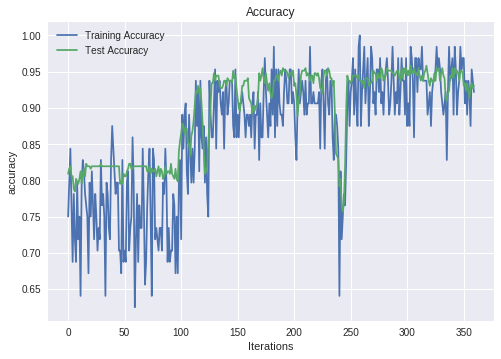

In [27]:
# plt.plot(range(1,iterations+1), training_accuracy, range(1,iterations+1), test_accuracy)
fig = plt.figure()
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title("Accuracy")
plt.xlabel("Iterations")
plt.ylabel("accuracy")
# plt.legend(['training', 'test'])
plt.legend()
plt.savefig('drive/My Drive/BE537 Irwin/AlexNet/training_test_accuracy_plot.png', dpi=300)
plt.show()

In [0]:
# lr = .005, iterations = 1000, batch = 32, test accuracy = .81
#   np.save('drive/My Drive/BE537 Irwin/AlexNet/train_acc_1', training_accuracy)
#   np.save('drive/My Drive/BE537 Irwin/AlexNet/test_acc_1', test_accuracy)
  
# # lr = .003, iterations = 1000, batch = 32, higher test accuracy = .826
#     np.save('drive/My Drive/BE537 Irwin/AlexNet/train_acc_2', training_accuracy)
#     np.save('drive/My Drive/BE537 Irwin/AlexNet/test_acc_2', test_accuracy)
#     np.save('drive/My Drive/BE537 Irwin/AlexNet/F1_2', F1)
#     np.save('drive/My Drive/BE537 Irwin/AlexNet/Recall_2', Recall)
#     np.save('drive/My Drive/BE537 Irwin/AlexNet/Precision_2', Precision)

# lr = .0005, iterations = 500, batch = 32
#   np.save('drive/My Drive/BE537 Irwin/AlexNet/train_acc_3', training_accuracy)
#   np.save('drive/My Drive/BE537 Irwin/AlexNet/test_acc_3', test_accuracy)

# lr = .0001, iterations = 500, batch = 32
#  np.save('drive/My Drive/BE537 Irwin/AlexNet/train_acc_4', training_accuracy)
#  np.save('drive/My Drive/BE537 Irwin/AlexNet/test_acc_4', test_accuracy)
  
# lr = .00005, iterations = 1000, batch = 64
#  np.save('drive/My Drive/BE537 Irwin/AlexNet/train_acc_5', training_accuracy)
#  np.save('drive/My Drive/BE537 Irwin/AlexNet/test_acc_5', test_accuracy)

# lr = .002, iterations = 1000, batch = 64 
#   np.save('drive/My Drive/BE537 Irwin/AlexNet/train_acc_6', training_accuracy)
#   np.save('drive/My Drive/BE537 Irwin/AlexNet/test_acc_6', test_accuracy)

# lr = .002, iterations = 1000, batch = 64 
#   np.save('drive/My Drive/BE537 Irwin/AlexNet/train_acc_7', training_accuracy)
#   np.save('drive/My Drive/BE537 Irwin/AlexNet/test_acc_7', test_accuracy)
#   np.save('drive/My Drive/BE537 Irwin/AlexNet/F1_7', F1)
#   np.save('drive/My Drive/BE537 Irwin/AlexNet/Recall_7', Recall)
#   np.save('drive/My Drive/BE537 Irwin/AlexNet/Precision_7', Precision)


In [0]:
test_labels.shape

(?,)


(288,)

*italicized text*# Part 1: (Train Model)